In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [8]:
# Load CSV files into DataFrames
batting_df = pd.read_csv('all_season_batting_card.csv')
bowling_df = pd.read_csv('all_season_bowling_card.csv')
summary_df = pd.read_csv('all_season_summary.csv')

In [9]:
# Display the first few rows of each DataFrame
print("Batting Data:")
print(batting_df.head())

Batting Data:
   season  match_id match_name home_team away_team  \
0  2023.0   1359475   GT v CSK        GT       CSK   
1  2023.0   1359475   GT v CSK        GT       CSK   
2  2023.0   1359475   GT v CSK        GT       CSK   
3  2023.0   1359475   GT v CSK        GT       CSK   
4  2023.0   1359475   GT v CSK        GT       CSK   

                                      venue       city country  \
0  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India   
1  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India   
2  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India   
3  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India   
4  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India   

  current_innings  innings_id  ... fours sixes  strikeRate  captain isNotOut  \
0             CSK           1  ...   0.0   0.0       16.66    False    False   
1             CSK           1  ...   4.0   9.0      184.00    False    False   
2             CSK       

In [10]:
print("\nBowling Data:")
print(bowling_df.head())


Bowling Data:
   season  match_id match_name home_team away_team bowling_team  \
0  2023.0   1359475   GT v CSK        GT       CSK           GT   
1  2023.0   1359475   GT v CSK        GT       CSK           GT   
2  2023.0   1359475   GT v CSK        GT       CSK           GT   
3  2023.0   1359475   GT v CSK        GT       CSK           GT   
4  2023.0   1359475   GT v CSK        GT       CSK           GT   

                                      venue       city country  innings_id  \
0  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India           1   
1  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India           1   
2  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India           1   
3  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India           1   
4  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India           1   

   ... conceded wickets  economyRate  dots  foursConceded  sixesConceded  \
0  ...       29       2         7.25 

In [11]:
print("\nSummary Data:")
print(summary_df.head())


Summary Data:
   season       id                                          name  short_name  \
0  2023.0  1359475          Gujarat Titans v Chennai Super Kings    GT v CSK   
1  2023.0  1359476          Punjab Kings v Kolkata Knight Riders  PBKS v KKR   
2  2023.0  1359477         Lucknow Super Giants v Delhi Capitals    LSG v DC   
3  2023.0  1359478        Sunrisers Hyderabad v Rajasthan Royals    SRH v RR   
4  2023.0  1359479  Royal Challengers Bangalore v Mumbai Indians    RCB v MI   

                                         description home_team away_team  \
0  1st Match (N), Indian Premier League at Ahmeda...        GT       CSK   
1  2nd Match (D/N), Indian Premier League at Chan...      PBKS       KKR   
2  3rd Match (N), Indian Premier League at Luckno...       LSG        DC   
3  4th Match (D/N), Indian Premier League at Hyde...       SRH        RR   
4  5th Match (N), Indian Premier League at Bengal...       RCB        MI   

  toss_won    decision 1st_inning_score  ...  \

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1029 non-null   float64
 1   id                1032 non-null   int64  
 2   name              1032 non-null   object 
 3   short_name        1032 non-null   object 
 4   description       1032 non-null   object 
 5   home_team         1032 non-null   object 
 6   away_team         1032 non-null   object 
 7   toss_won          1029 non-null   object 
 8   decision          1029 non-null   object 
 9   1st_inning_score  1021 non-null   object 
 10  2nd_inning_score  1019 non-null   object 
 11  home_score        1024 non-null   object 
 12  away_score        1021 non-null   object 
 13  winner            1031 non-null   object 
 14  result            1032 non-null   object 
 15  start_date        1032 non-null   object 
 16  end_date          1032 non-null   object 


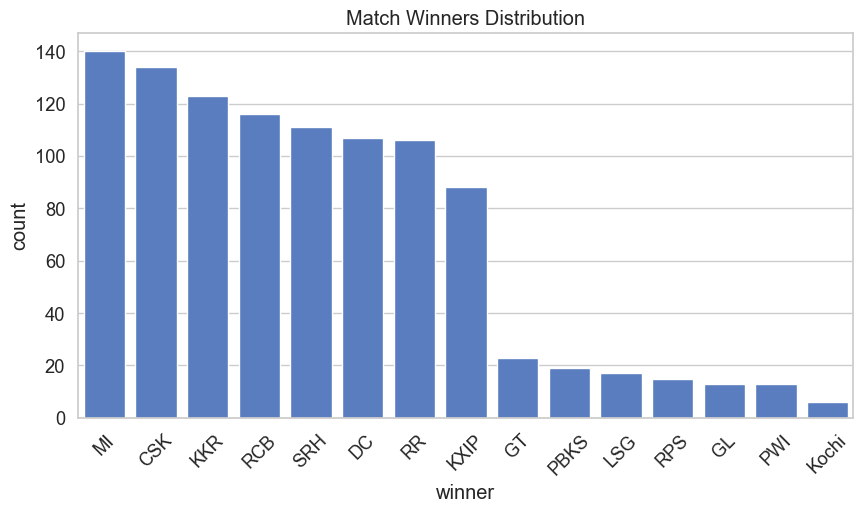

In [12]:
# Basic information on summary data
print(summary_df.info())
print(summary_df.describe())

# Check for missing values in summary_df
print("Missing values in summary data:\n", summary_df.isnull().sum())

# Visualize distribution of the target variable (assumed to be 'winner')
plt.figure(figsize=(10,5))
sns.countplot(data=summary_df, x='winner', order=summary_df['winner'].value_counts().index)
plt.title("Match Winners Distribution")
plt.xticks(rotation=45)
plt.show()

In [13]:
print("Columns in batting_df:", batting_df.columns)

Columns in batting_df: Index(['season', 'match_id', 'match_name', 'home_team', 'away_team', 'venue',
       'city', 'country', 'current_innings', 'innings_id', 'name', 'fullName',
       'runs', 'ballsFaced', 'minutes', 'fours', 'sixes', 'strikeRate',
       'captain', 'isNotOut', 'runningScore', 'runningOver', 'shortText',
       'commentary', 'link'],
      dtype='object')


In [14]:
# Aggregate batting statistics for home team
batting_agg_home = batting_df.groupby(['match_id', 'home_team']).agg({
    'runs': 'sum',
    'fours': 'sum',
    'sixes': 'sum'
}).reset_index()
batting_agg_home.columns = ['match_id', 'team', 'total_runs', 'total_fours', 'total_sixes']

# Aggregate batting statistics for away team
batting_agg_away = batting_df.groupby(['match_id', 'away_team']).agg({
    'runs': 'sum',
    'fours': 'sum',
    'sixes': 'sum'
}).reset_index()
batting_agg_away.columns = ['match_id', 'team', 'total_runs', 'total_fours', 'total_sixes']

# Combine home and away teams' batting statistics
batting_agg = pd.concat([batting_agg_home, batting_agg_away]).reset_index(drop=True)

# Check the final aggregated batting data
print("Aggregated Batting Stats:")
print(batting_agg.head())

Aggregated Batting Stats:
   match_id  team  total_runs  total_fours  total_sixes
0    335982   RCB       268.0         18.0         17.0
1    335983  KXIP       430.0         38.0         25.0
2    335984    DC       244.0         32.0          4.0
3    335985    MI       315.0         33.0         11.0
4    335986   KKR       184.0         11.0         10.0


In [15]:
# Copy the dataframe for modeling
df = summary_df.copy()

# Drop columns that are not needed (like match_id or date) – adjust as needed
# Ensure the column exists before attempting to drop it
drop_cols = ['match_id', 'date'] if 'date' in df.columns else ['match_id']
drop_cols = [col for col in drop_cols if col in df.columns]  # Only keep existing columns in drop_cols

df.drop(columns=drop_cols, inplace=True)

# Fill missing values if any (simple strategy: fill numerical with median, categorical with mode)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Separate target and features
target = 'winner'
X = df.drop(columns=[target])
y = df[target]

# Encode categorical variables
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Also encode the target variable
y = le.fit_transform(y)

# Feature scaling for numerical features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("Preprocessed feature sample:")
print(X.head())

Preprocessed feature sample:
     season        id  name  short_name  description  home_team  away_team  \
0  1.615373  1.396929    53          33          161          3          0   
1  1.615373  1.396932   138          98          341          9          4   
2  1.615373  1.396935   100          73          524          7          1   
3  1.615373  1.396938   200         158          699         14         13   
4  1.615373  1.396941   182         121          843         11          8   

   toss_won  decision  1st_inning_score  ...  home_playx1  away_playx1  \
0         3         1               349  ...          993          249   
1         4         1               412  ...          612          477   
2         1         1               423  ...          397          660   
3        13         1               465  ...           20         1010   
4        10         1               305  ...          952          772   

   away_key_batsman  away_key_bowler  match_days  umpire1

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Hyperparameters:", grid_rf.best_params_)

# Train the best estimator
best_rf = grid_rf.best_estimator_
best_rf.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


RandomForestClassifier(min_samples_split=5, random_state=42)

In [17]:
# Predictions on test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 94.20%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         2
           4       1.00      0.95      0.98        21
           5       1.00      0.96      0.98        24
           7       1.00      0.83      0.91         6
           8       0.79      1.00      0.88        23
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3
          11       0.96      0.96      0.96        24
          12       1.00      1.00      1.00         2
          13       0.85      0.88      0.87        26
          14       1.00      0.93      0.96        27

    accuracy                           0.94       207
   macro avg       0.96      0.91      0.92       207
weighted avg       0.95      0.94      0.94       207



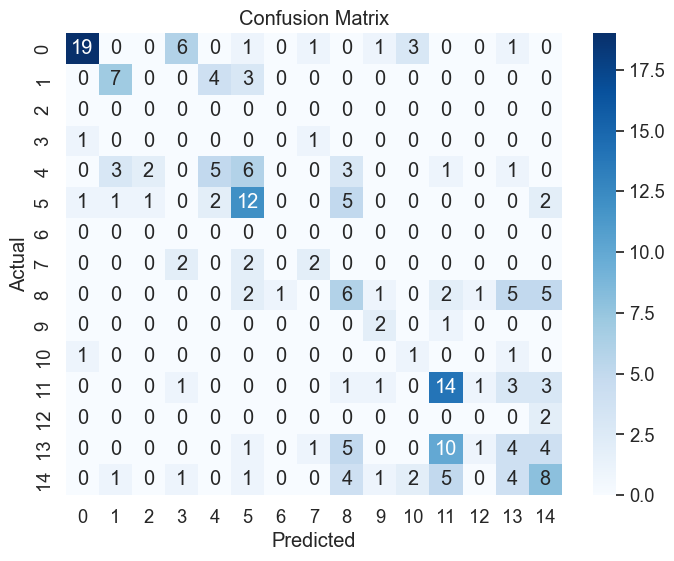

In [124]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

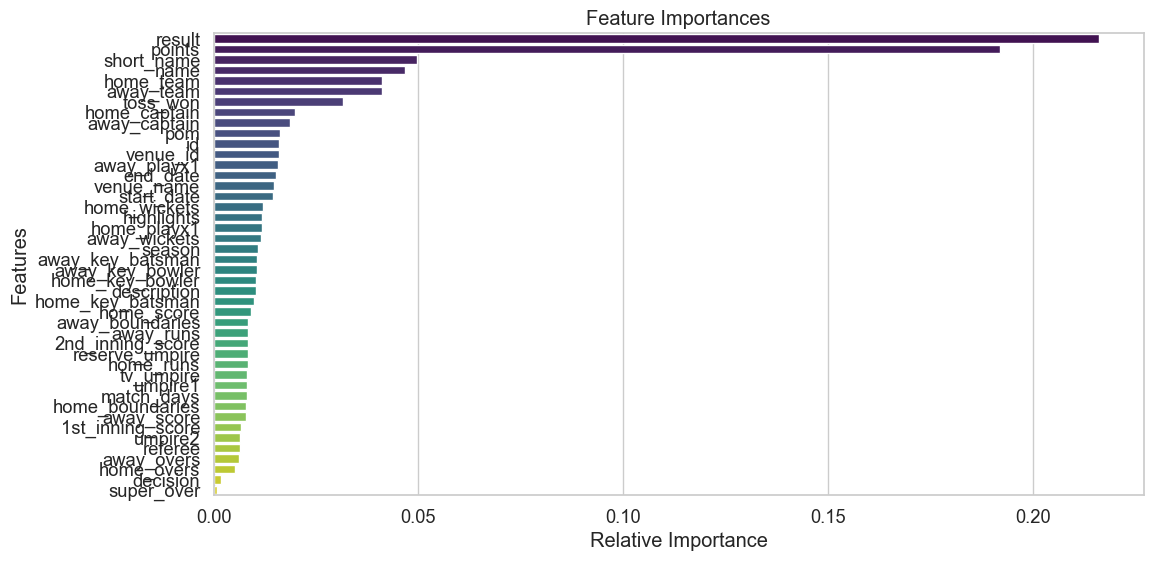

In [126]:
# Feature Importance Visualization
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importances")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

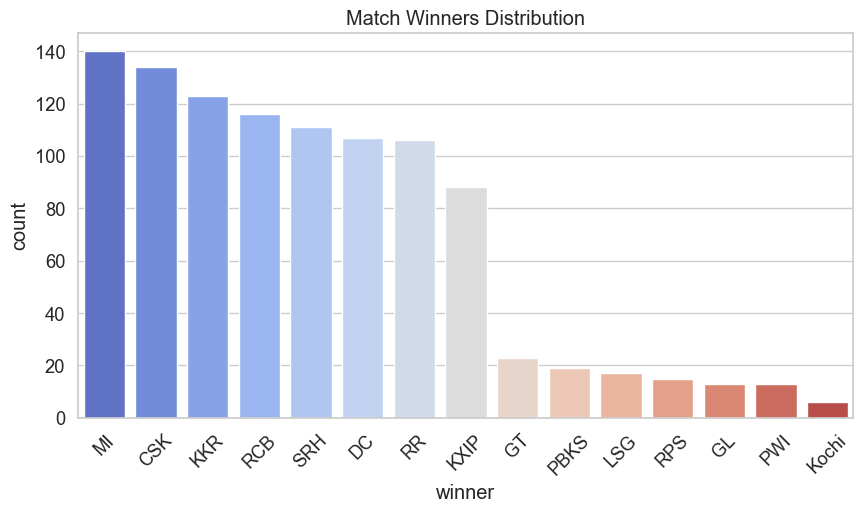

In [128]:
plt.figure(figsize=(10,5))
sns.countplot(data=summary_df, x='winner', order=summary_df['winner'].value_counts().index, palette='coolwarm')
plt.title("Match Winners Distribution")
plt.xticks(rotation=45)
plt.show()

In [130]:
import re

# Search for similar column names
pattern = re.compile(r'bat|run|team', re.IGNORECASE)
similar_columns = [col for col in summary_df.columns if pattern.search(col)]
print("Possible matching columns:", similar_columns)


Possible matching columns: ['home_team', 'away_team', 'home_runs', 'away_runs', 'home_key_batsman', 'away_key_batsman']


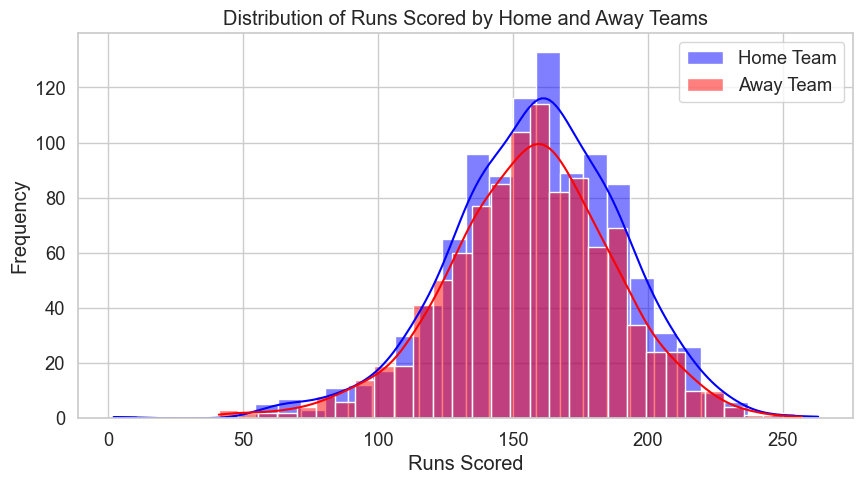

In [132]:
plt.figure(figsize=(10, 5))
sns.histplot(summary_df['home_runs'], bins=30, kde=True, color='blue', label='Home Team')
sns.histplot(summary_df['away_runs'], bins=30, kde=True, color='red', label='Away Team')
plt.legend()
plt.title("Distribution of Runs Scored by Home and Away Teams")
plt.xlabel("Runs Scored")
plt.ylabel("Frequency")
plt.show()

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier

#plt.style.use('seaborn-darkgrid')

# Ensure all required columns exist
required_columns = ['team1', 'team2', 'winner', 'bat_total_runs_team1', 'bat_total_runs_team2', 
                    'bowl_total_wickets_team1', 'bowl_total_wickets_team2', 'bat_total_sixes_team1']
missing_columns = [col for col in required_columns if col not in summary_df.columns]

if missing_columns:
    print(f"Warning: Missing columns - {missing_columns}. Some plots may not work.")

In [136]:
print(summary_df.columns)

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')


In [138]:
summary_df.columns = summary_df.columns.str.strip().str.lower()
print(summary_df.columns)

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')


In [140]:
print(summary_df.shape)  # Should return (rows, columns)
print(summary_df.head()) # Display the first few rows

(1032, 45)
   season       id                                          name  short_name  \
0  2023.0  1359475          Gujarat Titans v Chennai Super Kings    GT v CSK   
1  2023.0  1359476          Punjab Kings v Kolkata Knight Riders  PBKS v KKR   
2  2023.0  1359477         Lucknow Super Giants v Delhi Capitals    LSG v DC   
3  2023.0  1359478        Sunrisers Hyderabad v Rajasthan Royals    SRH v RR   
4  2023.0  1359479  Royal Challengers Bangalore v Mumbai Indians    RCB v MI   

                                         description home_team away_team  \
0  1st Match (N), Indian Premier League at Ahmeda...        GT       CSK   
1  2nd Match (D/N), Indian Premier League at Chan...      PBKS       KKR   
2  3rd Match (N), Indian Premier League at Luckno...       LSG        DC   
3  4th Match (D/N), Indian Premier League at Hyde...       SRH        RR   
4  5th Match (N), Indian Premier League at Bengal...       RCB        MI   

  toss_won    decision 1st_inning_score  ...  \
0  

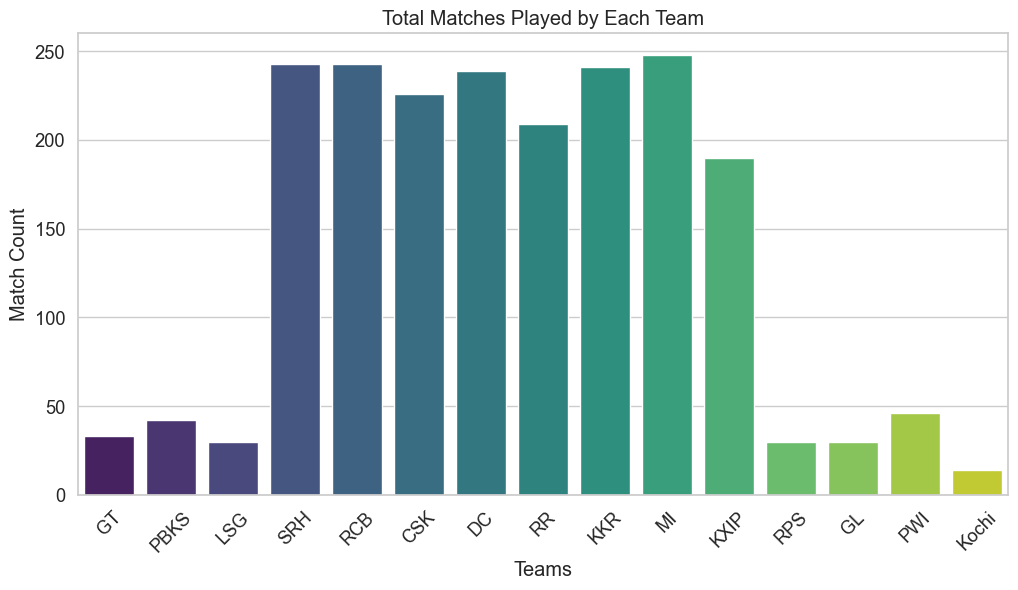

In [142]:
# 2. Total Matches Played by Each Team
plt.figure(figsize=(12,6))

# Use home_team and away_team instead of team1 and team2
sns.countplot(data=pd.melt(summary_df[['home_team', 'away_team']]), x='value', palette='viridis')

plt.title("Total Matches Played by Each Team")
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Match Count")
plt.show()

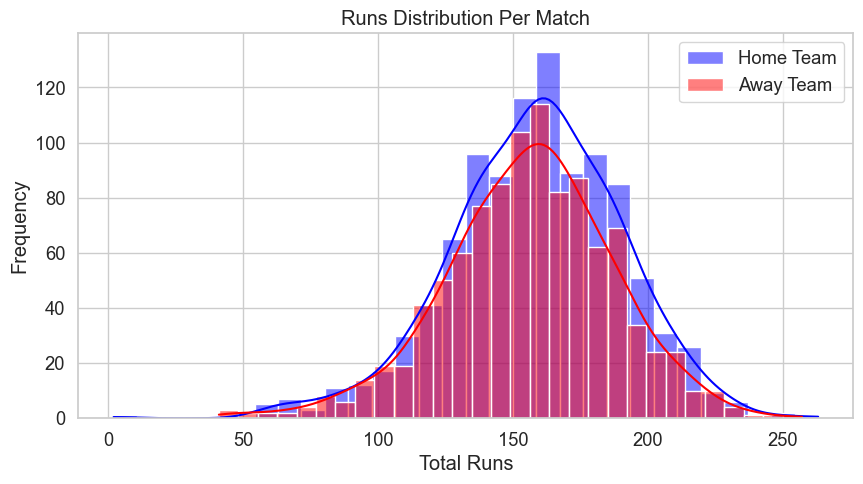

In [144]:
# 3. Runs Distribution Per Match
plt.figure(figsize=(10,5))
sns.histplot(summary_df['home_runs'], bins=30, kde=True, color='blue', label='Home Team')
sns.histplot(summary_df['away_runs'], bins=30, kde=True, color='red', label='Away Team')
plt.legend()
plt.title("Runs Distribution Per Match")
plt.xlabel("Total Runs")
plt.ylabel("Frequency")
plt.show()

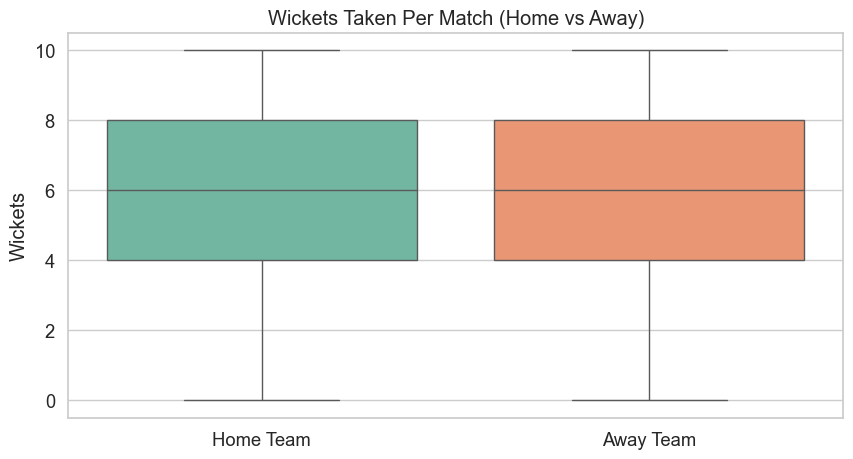

In [146]:
# 4. Wickets Taken Per Match
plt.figure(figsize=(10,5))
sns.boxplot(data=summary_df[['home_wickets', 'away_wickets']], palette='Set2')
plt.title("Wickets Taken Per Match (Home vs Away)")
plt.ylabel("Wickets")
plt.xticks([0,1], ['Home Team', 'Away Team'])
plt.show()

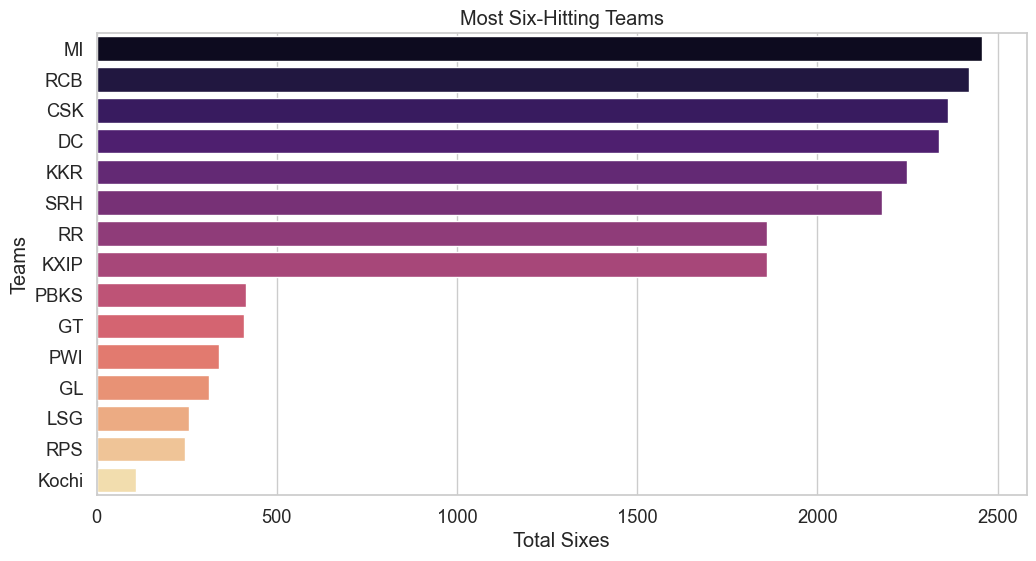

In [148]:
# 5. Most Six-Hitting Teams
six_totals = summary_df.groupby('home_team')['home_boundaries'].sum().reset_index().sort_values(by='home_boundaries', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='home_boundaries', y='home_team', data=six_totals, palette='magma')
plt.title("Most Six-Hitting Teams")
plt.xlabel("Total Sixes")
plt.ylabel("Teams")
plt.show()

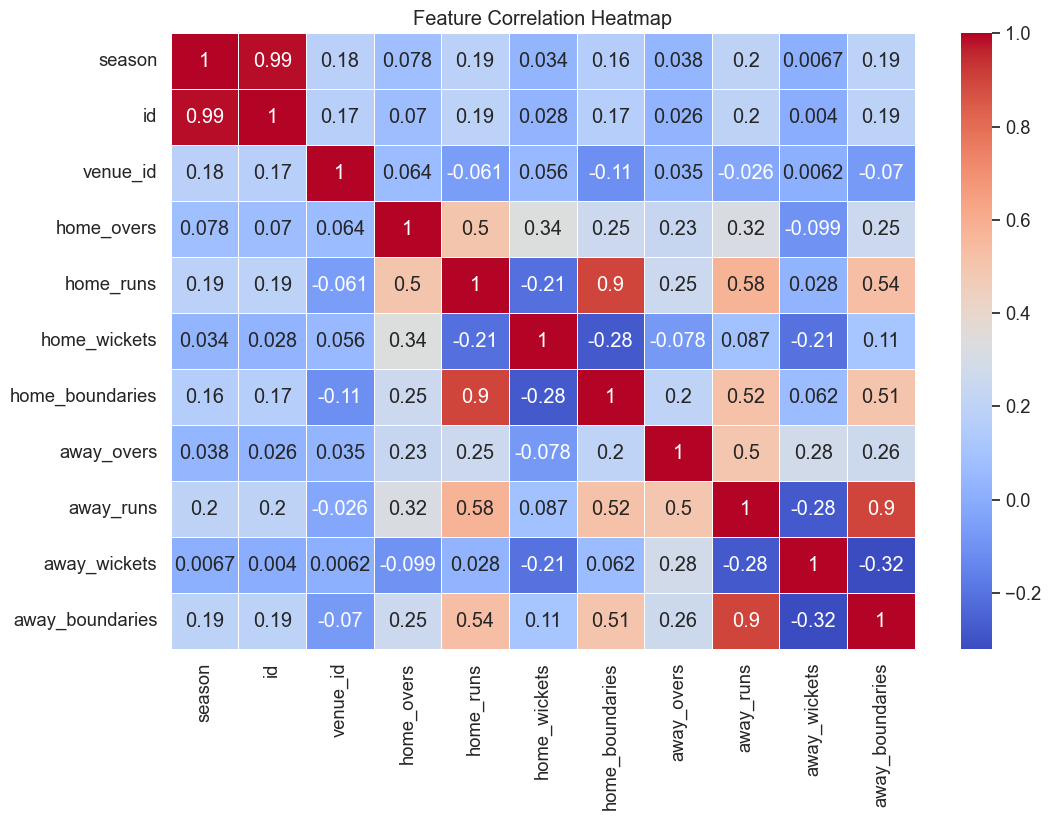

In [150]:
# 6. Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(summary_df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

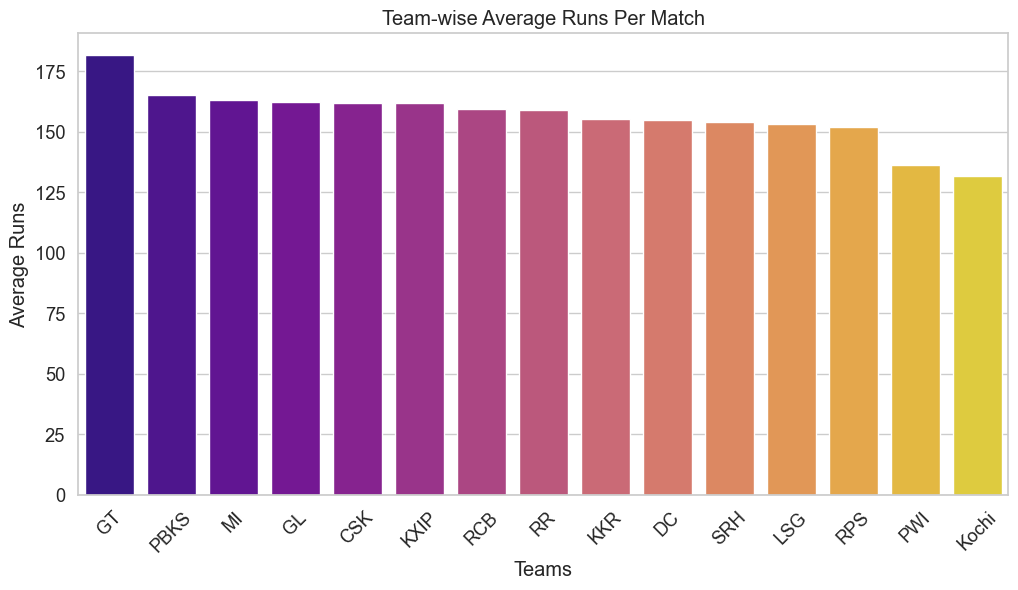

In [152]:
# 8. Team-wise Average Runs per Match
team_avg_runs = summary_df.groupby('home_team')['home_runs'].mean().reset_index().sort_values(by='home_runs', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='home_team', y='home_runs', data=team_avg_runs, palette='plasma')
plt.xticks(rotation=45)
plt.title("Team-wise Average Runs Per Match")
plt.xlabel("Teams")
plt.ylabel("Average Runs")
plt.show()

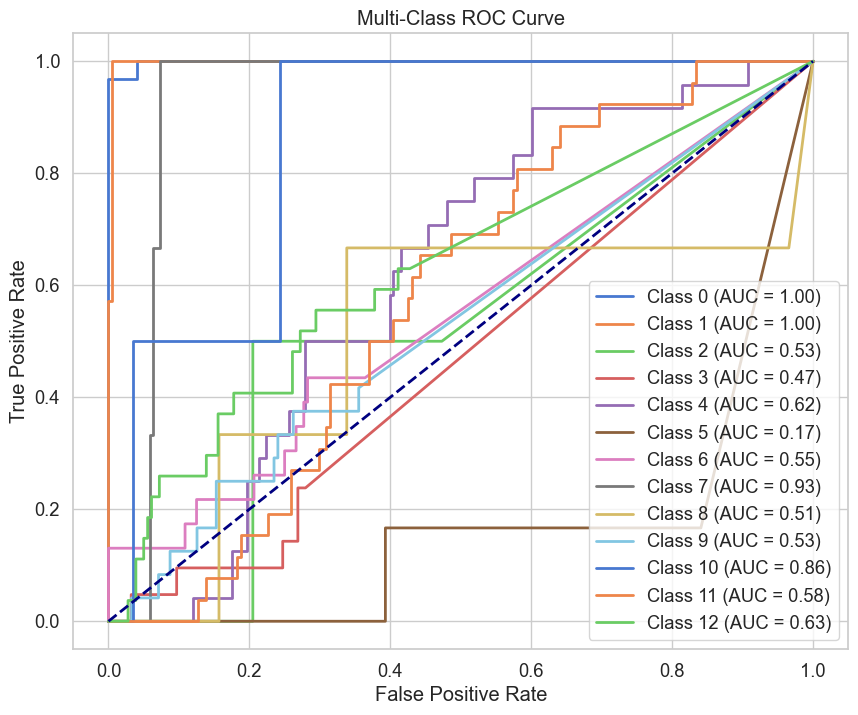

In [154]:
# 11. ROC Curve (If model and y_test exist)
if 'y_test' in globals() and 'best_rf' in globals():
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]
    
    ovr = OneVsRestClassifier(best_rf)
    y_score = ovr.fit(X_train, y_train).predict_proba(X_test)

    plt.figure(figsize=(10,8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [156]:
import pickle

# Save the best model to a file
with open("best_rf_model.pkl", "wb") as file:
    pickle.dump(best_rf, file)

print("Model saved successfully as best_rf_model.pkl")

Model saved successfully as best_rf_model.pkl


In [158]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [160]:
# Initialize models
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

In [162]:
# Train models
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
svm.fit(X_train, y_train)
mlp.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5659
[LightGBM] [Info] Number of data points in the train set: 825, number of used features: 43
[LightGBM] [Info] Start training from score -2.090411
[LightGBM] [Info] Start training from score -2.182784
[LightGBM] [Info] Start training from score -4.150434
[LightGBM] [Info] Start training from score -3.670861
[LightGBM] [Info] Start training from score -2.090411
[LightGBM] [Info] Start training from score -2.556500
[LightGBM] [Info] Start training from score -4.923624
[LightGBM] [Info] Start training from score -4.317488
[LightGBM] [Info] Start training from score -1.944699
[LightGBM] [Info] Start training from score -3.942795
[LightGBM] [Info] Start training from score -4.412798
[LightGBM] [Info] Start training from score -2.193595
[LightGBM] [Info] Start training from score -4.150434
[LightGBM] 

MLPClassifier(max_iter=500, random_state=42)

In [164]:
# Predict probabilities for ROC Curve
y_score_xgb = xgb.predict_proba(X_test)
y_score_lgbm = lgbm.predict_proba(X_test)
y_score_svm = svm.predict_proba(X_test)
y_score_mlp = mlp.predict_proba(X_test)

In [168]:
# Print Accuracy and Classification Reports
for model_name, model in zip(['XGBoost', 'LightGBM', 'SVM', 'MLP'], [xgb, lgbm, svm, mlp]):
    y_pred = model.predict(X_test)
    print(f'\n{model_name} Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
    print(f'Classification Report for {model_name}:')
    print(classification_report(y_test, y_pred))


XGBoost Accuracy: 97.10%
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.93      1.00      0.97        14
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         2
           4       1.00      0.90      0.95        21
           5       1.00      0.96      0.98        24
           7       0.86      1.00      0.92         6
           8       0.96      1.00      0.98        23
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00         2
          13       0.93      1.00      0.96        26
          14       1.00      0.93      0.96        27

    accuracy                           0.97       207
   macro avg       0.91      0.91      0.91       207
weighted avg       

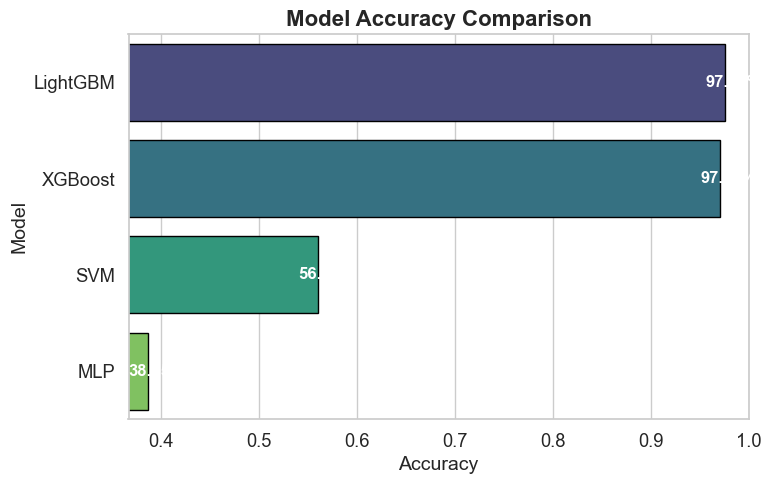

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model Accuracies
model_accuracies = {
    'XGBoost': accuracy_score(y_test, xgb.predict(X_test)),
    'LightGBM': accuracy_score(y_test, lgbm.predict(X_test)),
    'SVM': accuracy_score(y_test, svm.predict(X_test)),
    'MLP': accuracy_score(y_test, mlp.predict(X_test))
}

# Sort for Better Visualization
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)

# Extract names and accuracies
model_names, accuracies = zip(*sorted_models)

# Create a Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=accuracies, y=model_names, palette="viridis", edgecolor="black")

# Add Data Labels
for index, value in enumerate(accuracies):
    plt.text(value - 0.02, index, f"{value*100:.2f}%", va='center', fontsize=12, color="white", fontweight="bold")

# Titles and Labels
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.title("Model Accuracy Comparison", fontsize=16, fontweight="bold")

plt.xlim([min(accuracies) - 0.02, 1])  # Adjust x-axis for better spacing
plt.show()

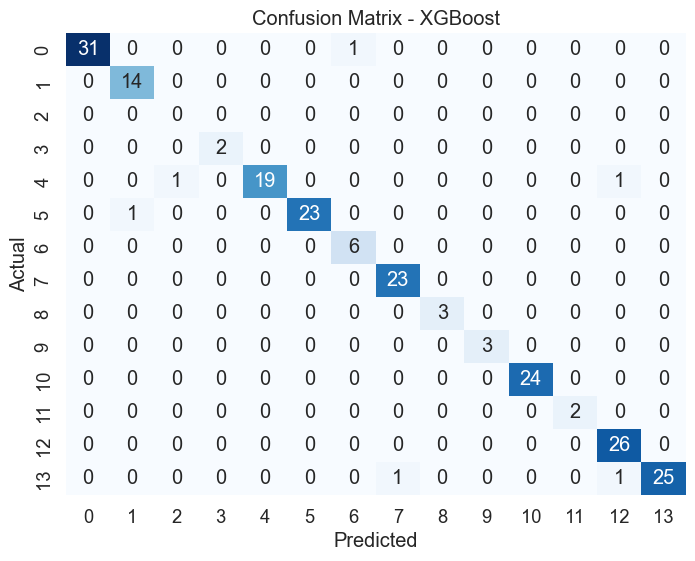

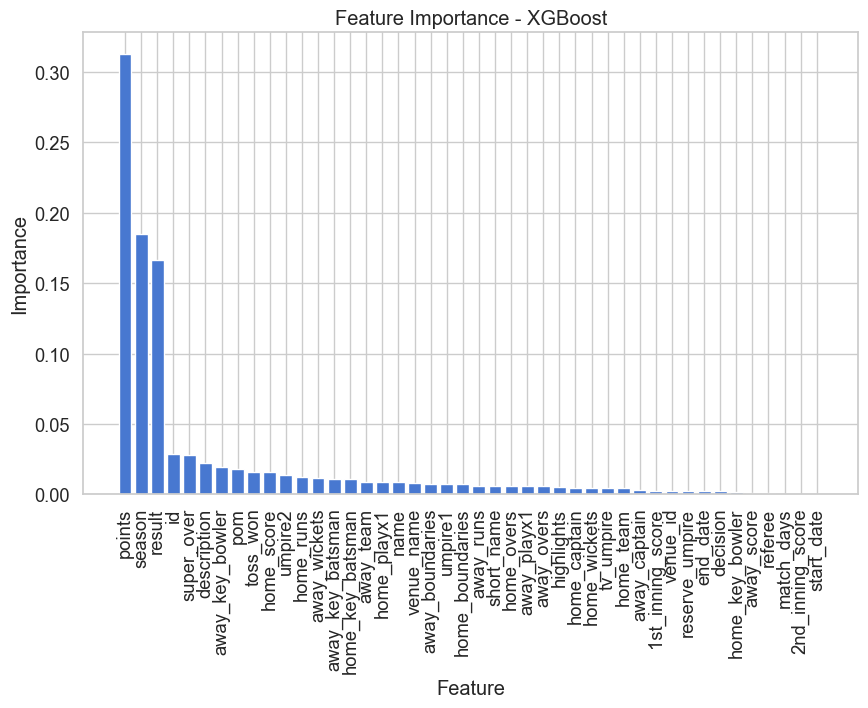

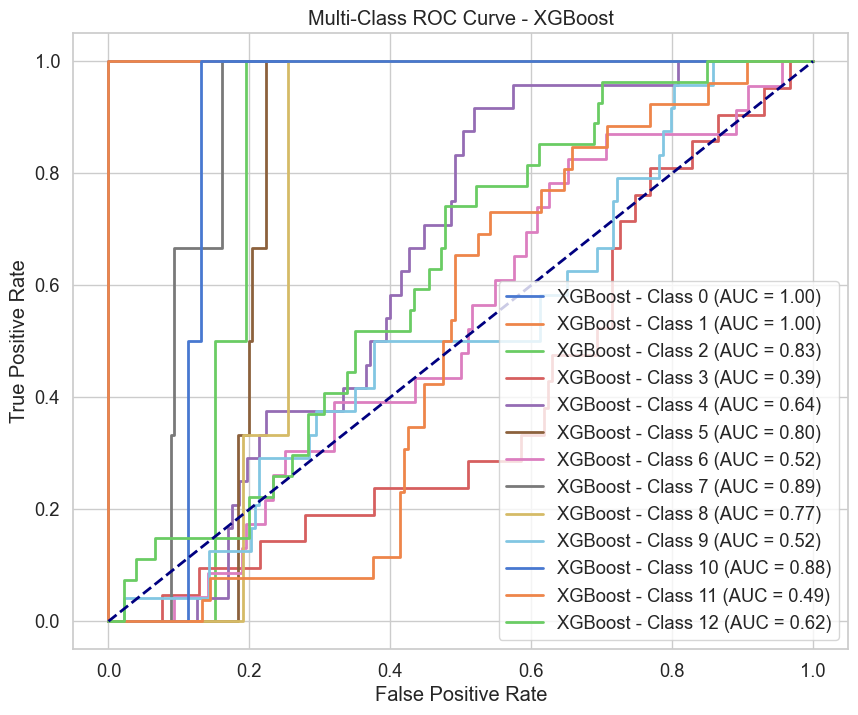

In [222]:
# Extract feature names from training data
feature_names = X_test.columns if hasattr(X_test, 'columns') else [f"Feature {i}" for i in range(X_test.shape[1])]

# Now run the visualization functions
plot_confusion_matrix(xgb, X_test, y_test, "XGBoost")
plot_feature_importance(xgb, feature_names, "XGBoost")
plot_roc_curve(xgb, X_test, y_test_bin, "XGBoost", n_classes)

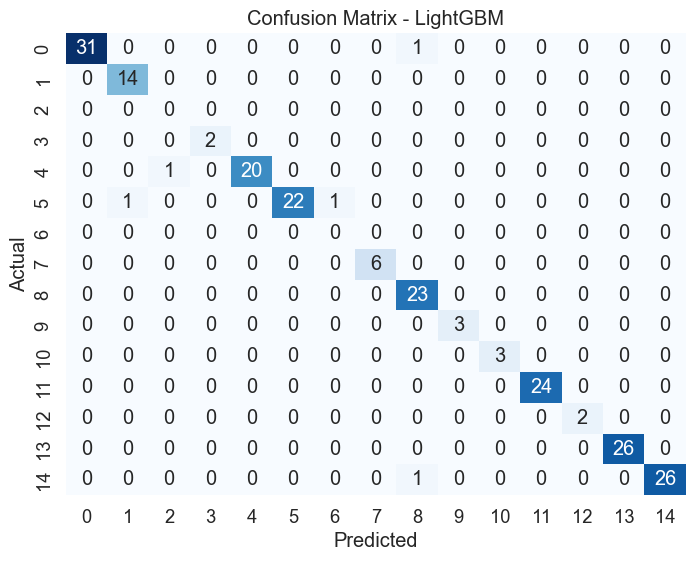

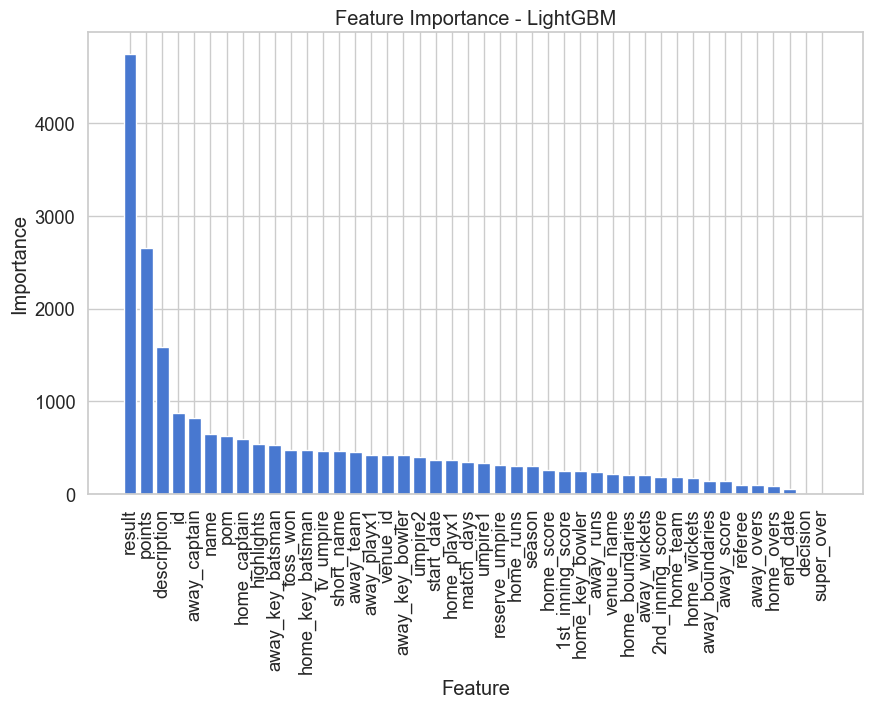

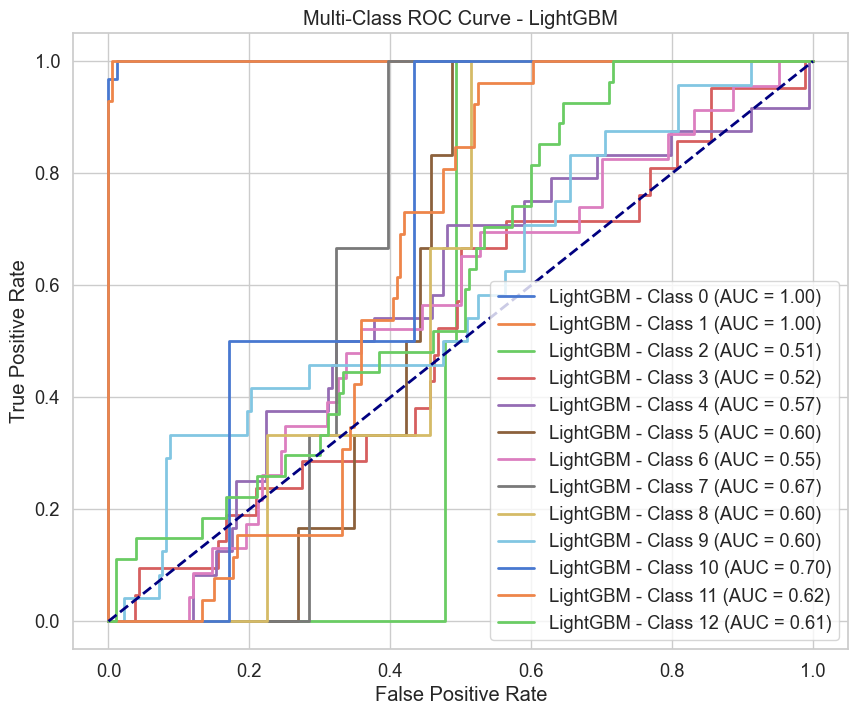

In [224]:
# Extract feature names for LightGBM
feature_names = X_test.columns if hasattr(X_test, 'columns') else [f"Feature {i}" for i in range(X_test.shape[1])]

# Plot visualizations for LightGBM
plot_confusion_matrix(lgbm, X_test, y_test, "LightGBM")
plot_feature_importance(lgbm, feature_names, "LightGBM")
plot_roc_curve(lgbm, X_test, y_test_bin, "LightGBM", n_classes)

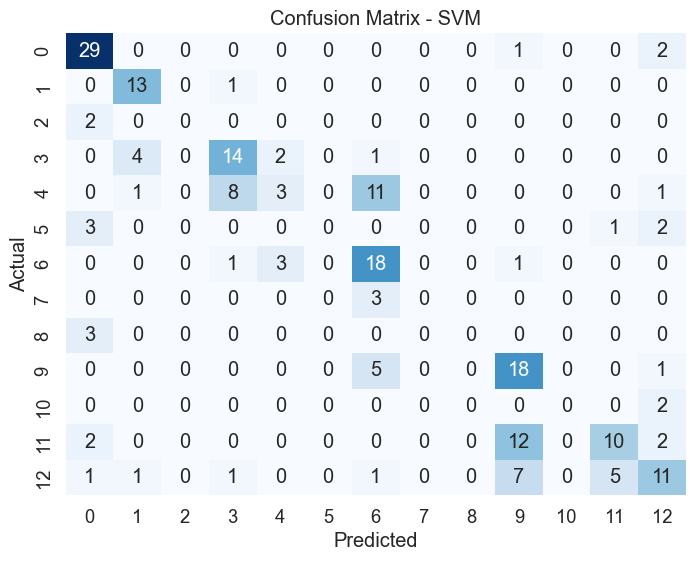

Feature importance not available for SVM


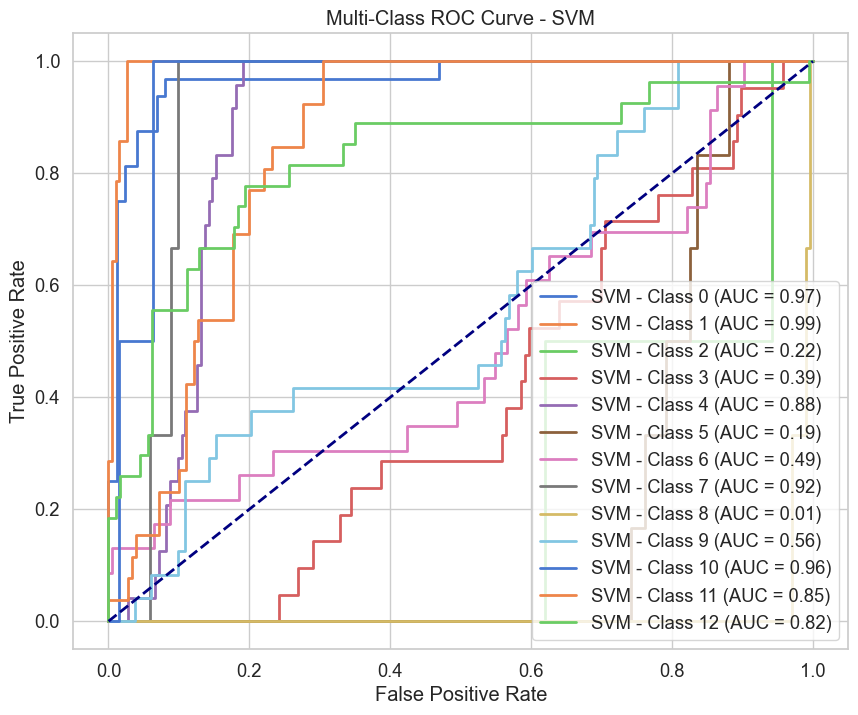

In [226]:
# Extract feature names from training data
feature_names = X_test.columns if hasattr(X_test, 'columns') else [f"Feature {i}" for i in range(X_test.shape[1])]

# Run visualization functions for SVM
plot_confusion_matrix(svm, X_test, y_test, "SVM")
plot_feature_importance(svm, feature_names, "SVM")
plot_roc_curve(svm, X_test, y_test_bin, "SVM", n_classes)

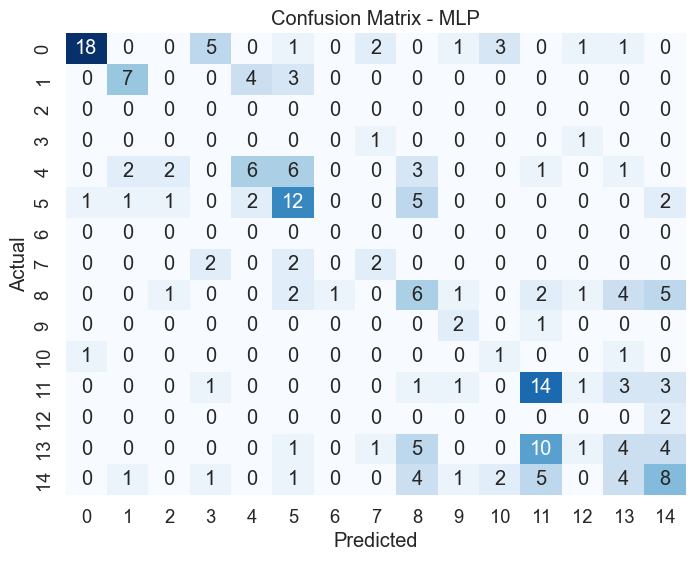

Feature importance not available for MLP


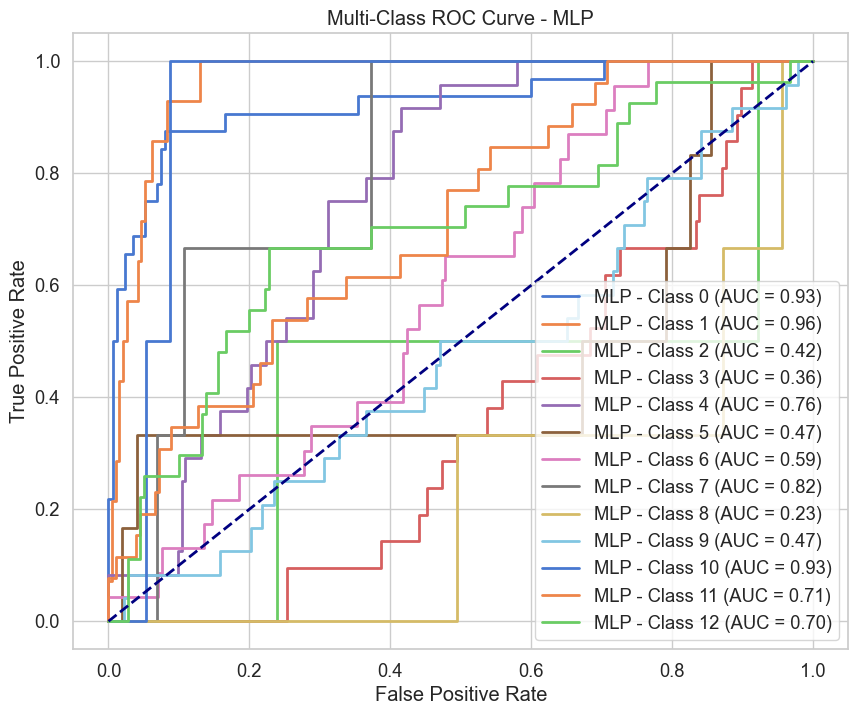

In [228]:
# Extract feature names from training data
feature_names = X_test.columns if hasattr(X_test, 'columns') else [f"Feature {i}" for i in range(X_test.shape[1])]

# Run visualization functions for MLP
plot_confusion_matrix(mlp, X_test, y_test, "MLP")
plot_feature_importance(mlp, feature_names, "MLP")
plot_roc_curve(mlp, X_test, y_test_bin, "MLP", n_classes)

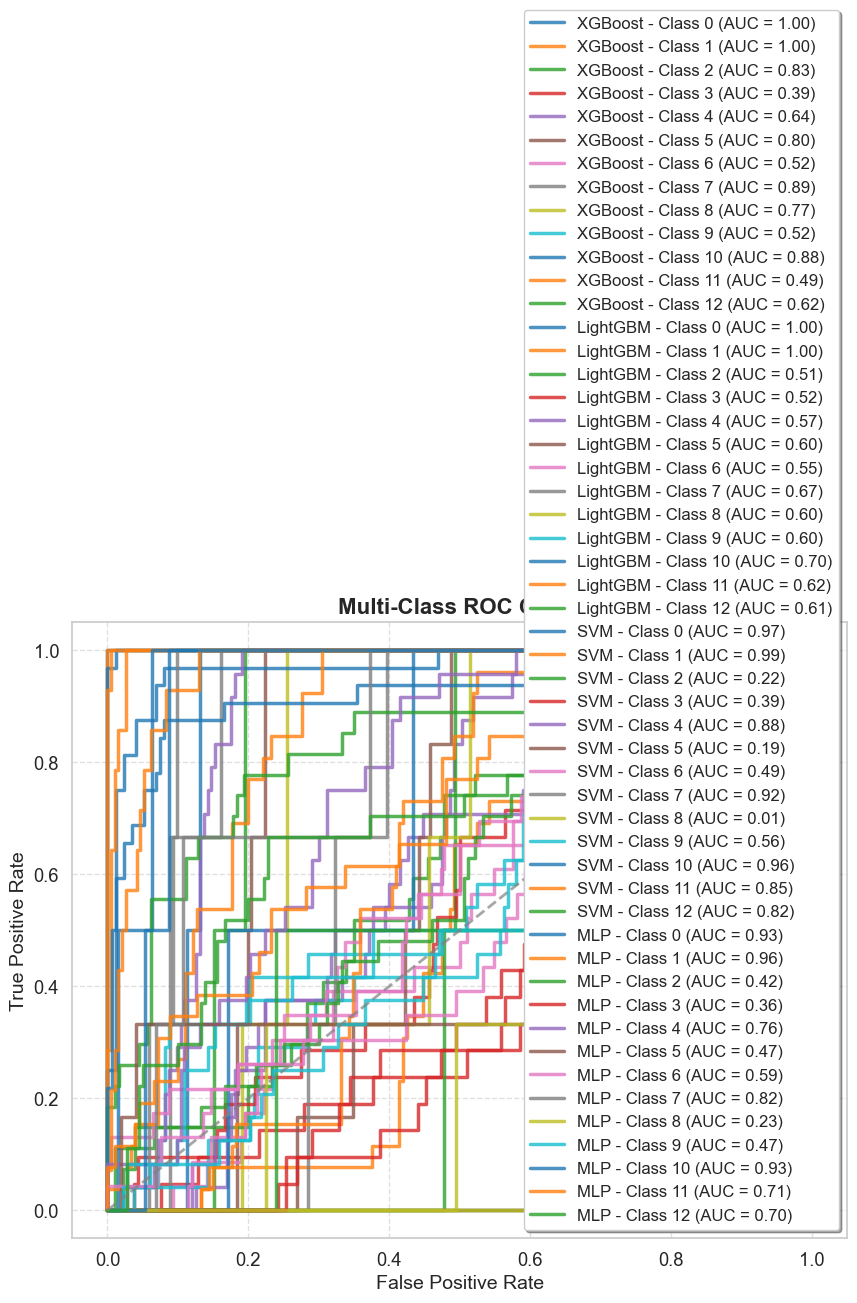

In [218]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import numpy as np

# Set a modern style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

# Define a color palette
colors = sns.color_palette("tab10", n_classes)

# Compute ROC curves with improved visualization
for model_name, y_score in models.items():
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2.5, alpha=0.8, label=f'{model_name} - Class {i} (AUC = {roc_auc[i]:.2f})')

# Diagonal Reference Line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', alpha=0.7)

# Titles and Labels
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Multi-Class ROC Curve', fontsize=16, fontweight='bold')

# Improved Legend
plt.legend(loc='lower right', fontsize=12, frameon=True, fancybox=True, shadow=True)

# Show Grid
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [232]:
import pickle
import joblib
from sklearn.preprocessing import LabelEncoder

# Save the trained LightGBM model
with open("lightgbm_model.pkl", "wb") as file:
    pickle.dump(lgbm, file)

print("Model saved successfully as lightgbm_model.pkl")

# Encode the target variable again
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Save the updated encoder
joblib.dump(encoder, 'label_encoder.pkl')

print("Label Encoder saved successfully as label_encoder.pkl")

Model saved successfully as lightgbm_model.pkl
Label Encoder saved successfully as label_encoder.pkl


In [234]:
import pandas as pd

df = pd.read_csv("static/all_season_bowling_card.csv")
print(df["name"].unique())

['Mohammed Shami' 'HH Pandya' 'JB Little' 'Rashid Khan' 'AS Joseph'
 'Yash Dayal' 'DL Chahar' 'TU Deshpande' 'RS Hangargekar' 'MJ Santner'
 'RA Jadeja' 'UT Yadav' 'TG Southee' 'SP Narine' 'CV Varun' 'SN Thakur'
 'SM Curran' 'Arshdeep Singh' 'NT Ellis' 'Sikandar Raza' 'R Dhawan'
 'RD Chahar' 'Harpreet Brar' 'KK Ahmed' 'Mukesh Kumar' 'C Sakariya'
 'AR Patel' 'Kuldeep Yadav' 'KR Mayers' 'JD Unadkat' 'K Gowtham'
 'Avesh Khan' 'MA Wood' 'Ravi Bishnoi' 'B Kumar' 'Fazalhaq Farooqi'
 'Washington Sundar' 'T Natarajan' 'AU Rashid' 'Umran Malik' 'TA Boult'
 'KM Asif' 'JO Holder' 'R Ashwin' 'YS Chahal' 'NA Saini' 'Mohammed Siraj'
 'RJW Topley' 'Akash Deep' 'HV Patel' 'KV Sharma' 'MG Bracewell'
 'GJ Maxwell' 'JP Behrendorff' 'Arshad Khan' 'JC Archer' 'PP Chawla'
 'C Green' 'HR Shokeen' 'KH Pandya' 'Yash Thakur' 'BA Stokes' 'MM Ali'
 'A Nortje' 'MR Marsh' 'DJ Willey' 'Shahbaz Ahmed' 'Suyash Sharma'
 'DJ Hooda' 'A Mishra' 'AK Markram' 'R Powell' 'Sandeep Sharma' 'M Ashwin'
 'SSB Magala' 'D Pretorius'

In [238]:
import pandas as pd

# Load the bowling dataset
df_bowling = pd.read_csv('all_season_bowling_card.csv')

In [242]:
df_bowling.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team',
       'bowling_team', 'venue', 'city', 'country', 'innings_id', 'name',
       'fullName', 'overs', 'maidens', 'conceded', 'wickets', 'economyRate',
       'dots', 'foursConceded', 'sixesConceded', 'wides', 'noballs', 'captain',
       'href'],
      dtype='object')

In [244]:
df_bowling[df_bowling['name'] == 'HH Pandya'].shape[0]

81

In [254]:
df_bowling[df_bowling['name'] == 'Rashid Khan'].shape[0]

109